In [1]:
%matplotlib inline

import os
import unicodedata
import pandas as pd

import numpy
import numpy as np
import sympy

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation

from scipy.interpolate import make_interp_spline, BSpline
from scipy.ndimage.filters import gaussian_filter1d

from IPython.display import HTML
from IPython import display

s = sympy.symbols

In [2]:
graphs = []
log_path = "/home/datta/lab/Rethinking-Binarized-Neural-Network-Optimization/logs/hyperparameter_logs/acc/"
files = ["pit6g2","pit6g3","pit6g4"]
colors = ['','','','blue','orange','green']

files = ["ta3","ta4","ta5","va3","va4","va5"]
for file in files: #os.listdir(log_path):
    df = pd.read_json(log_path+file+".json")
    df = df[[1, 2]]
    if file[0] == 't':
        df[2] = gaussian_filter1d(df[2], sigma=100)
    df['label'] = file.split(".json")[0]
    df['color'] = colors[int(file[-1])]
    if file[0] == 'v':
        df['style'] = "--"
    else:
        df['style'] = "-"
        
    graphs.append(df)


def best_acc(df):
    return df[2].max()

sorted_graphs = sorted(graphs, key = best_acc, reverse=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f6e72f98940> has a label of '_nolegend_' which cannot be automatically added to the legend.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f6e72f98ef0> has a label of '_nolegend_' which cannot be automatically added to the legend.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f6e72f76828> has a label of '_nolegend_' which cannot be automatically added to the legend.


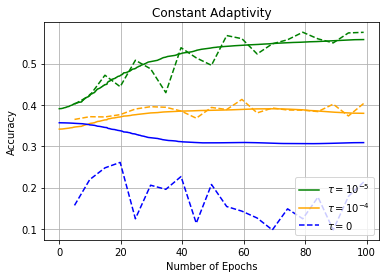

In [4]:
%matplotlib inline
fig, ax = plt.subplots(1, 1)
_ = plt.rcParams['figure.figsize'] = (15, 5)

labels = []
for df in sorted_graphs:
    _ = ax.plot(df[1]/909, df[2], df['color'][0], linestyle=df['style'][0])
    labels.append(df['label'][0])

#     print(df['label'][0])
# _ = plt.ylim(0.8, 1)
_ = plt.title(r"Constant Adaptivity")
_ = plt.grid(True)
_ = plt.xlabel("Number of Epochs")
_ = plt.ylabel("Accuracy")


labels = [
    "_nolegend_",
    r'$\tau = 10^{-5}$',
    "_nolegend_",
    r'$\tau = 10^{-4}$',
    "_nolegend_",
    r'$\tau = 0$'
]
# g 5 y 4 b 3
_ = ax.legend(labels, loc=4)


In [7]:
fig.savefig("plots/acc_gamma_const_rect.png")

In [10]:
graphs

[         1         2 label color
 0        1  0.340454   ta0  blue
 1      211  0.340456   ta0  blue
 2      331  0.340461   ta0  blue
 3      351  0.340469   ta0  blue
 4      401  0.340479   ta0  blue
 ..     ...       ...   ...   ...
 995  89481  0.360150   ta0  blue
 996  89571  0.360147   ta0  blue
 997  89731  0.360146   ta0  blue
 998  89881  0.360145   ta0  blue
 999  89981  0.360144   ta0  blue
 
 [1000 rows x 4 columns],          1         2 label   color
 0        1  0.399805   ta1  orange
 1      211  0.399811   ta1  orange
 2      331  0.399822   ta1  orange
 3      351  0.399838   ta1  orange
 4      401  0.399861   ta1  orange
 ..     ...       ...   ...     ...
 995  89481  0.574443   ta1  orange
 996  89571  0.574448   ta1  orange
 997  89731  0.574452   ta1  orange
 998  89881  0.574454   ta1  orange
 999  89981  0.574455   ta1  orange
 
 [1000 rows x 4 columns],          1         2 label  color
 0        1  0.367527   ta2  green
 1      211  0.367532   ta2  green
 

In [9]:
df

,1,2,label,color
0,1,0.367527,ta2,green
1,211,0.367532,ta2,green
2,331,0.367544,ta2,green
3,351,0.367561,ta2,green
4,401,0.367585,ta2,green
...,...,...,...,...
995,89481,0.527524,ta2,green
996,89571,0.527525,ta2,green
997,89731,0.527525,ta2,green
998,89881,0.527525,ta2,green


In [30]:
T = df
xnew = np.linspace(T.min(),T.max(),float(300)) #300 represents number of points to make between T.min and T.max

spl = make_interp_spline(T, power, k=3) #BSpline object
power_smooth = spl(xnew)

plt.plot(xnew,power_smooth)
plt.show()

TypeError: can't multiply sequence by non-int of type 'float'